In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")

from keras.optimizers import adam as adam_v2
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
data=pd.read_csv("gas_turbines.csv")

# EDA and data visualization

In [3]:
data = data.drop(columns = ['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'], axis = 1)

In [4]:
data.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
data.shape

(15039, 4)

In [7]:
data.isna().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.corr()

,AT,AP,AH,TEY
AT,1.000000,-0.412953,-0.549432,-0.207495
AP,-0.412953,1.000000,0.042573,0.146939
AH,-0.549432,0.042573,1.000000,-0.110272
TEY,-0.207495,0.146939,-0.110272,1.000000


In [10]:
data.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


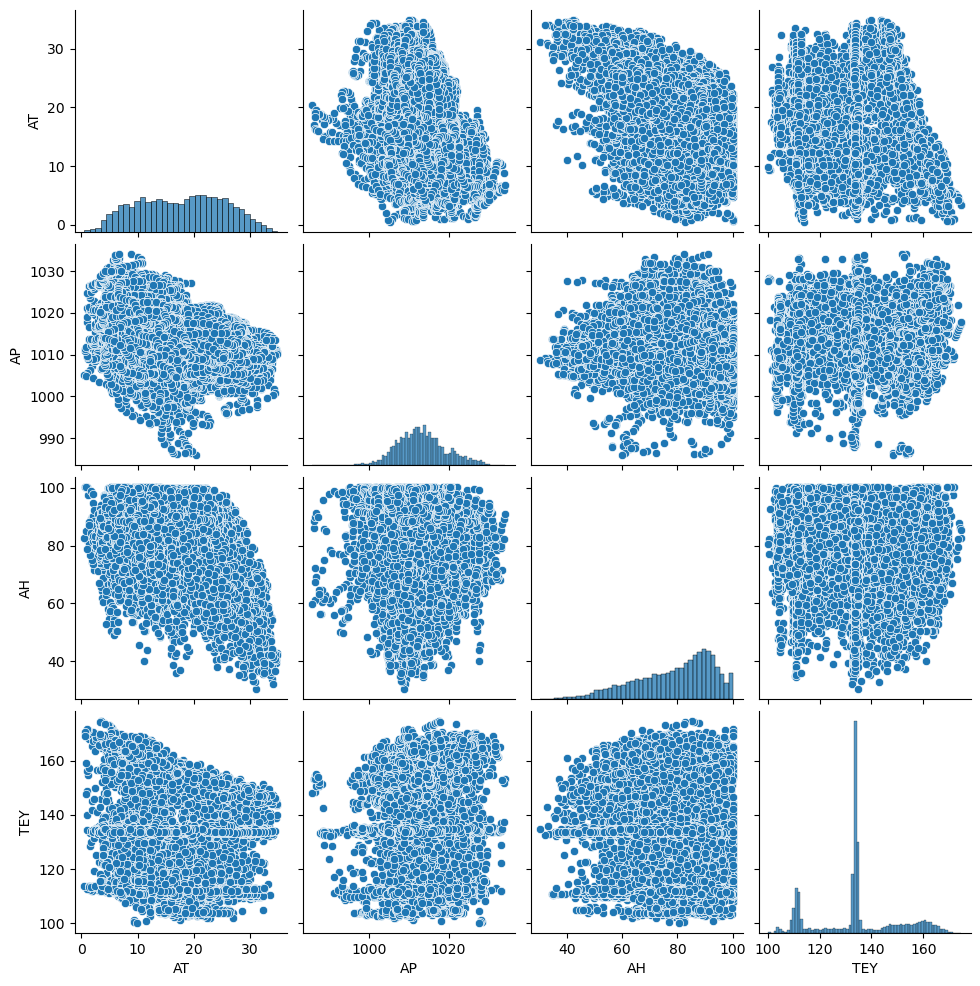

In [11]:
sns.pairplot(data)

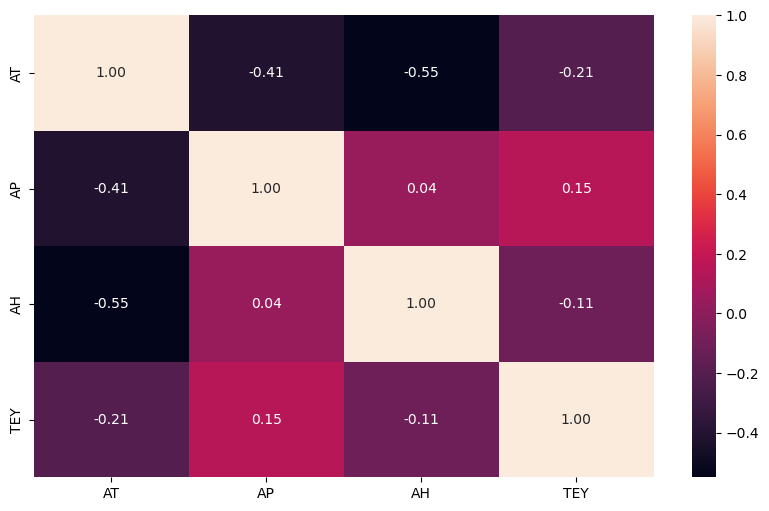

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

In [13]:
x=data.drop(["TEY"],axis=1)
y=data["TEY"]

In [14]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [16]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(x_train))
xtrain_scale=scaler_x.transform(x_train)

print(scaler_x.fit(x_test))
xtest_scale=scaler_x.transform(x_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


# model building

##### Tuning of Hyperparameters using different techniques
1. Batch Size and Epochs
2. Learning rate and Drop out rate
3. Activation Function and Kernel Initializer
4. Number of Neurons in Activation layer
5. Training model with optimum values of Hyperparameters 

In [18]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2100,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2100)              10500     
                                                                 
 dense_2 (Dense)             (None, 1)                 2101      
                                                                 
Total params: 12,617
Trainable params: 12,617
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss="mean_squared_error",optimizer="sgd",metrics=["mae"])

In [21]:
history=model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 1s 9ms/step - loss: 0.1071 - mae: 0.2688 - val_loss: 0.0496 - val_mae: 0.1766
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0468 - mae: 0.1607 - val_loss: 0.0442 - val_mae: 0.1479
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0453 - mae: 0.1504 - val_loss: 0.0440 - val_mae: 0.1483
Epoch 4/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0452 - mae: 0.1510 - val_loss: 0.0440 - val_mae: 0.1471
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0452 - mae: 0.1506 - val_loss: 0.0440 - val_mae: 0.1490
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0452 - mae: 0.1512 - val_loss: 0.0440 - val_mae: 0.1478
Epoch 7/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0452 - mae: 0.1509 - val_loss: 0.0440 - val_mae: 0.1470
Epoch 8/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0451 - m

In [22]:
model.save_weights("mywt.kmw")

In [23]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 10281.9434 - mae: 100.1789
mae: 10017.89%


In [24]:
scores

[10281.943359375, 100.17886352539062]

In [25]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [26]:
model_history = pd.DataFrame(history.history)
model_history["epoch"]=history.epoch
model_history.tail()

,loss,mae,val_loss,val_mae,epoch
95,0.042322,0.153905,0.041256,0.151051,95
96,0.042281,0.154124,0.041352,0.151925,96
97,0.042272,0.154417,0.041211,0.151047,97
98,0.042194,0.154269,0.041190,0.151742,98
99,0.042178,0.154540,0.041144,0.151664,99


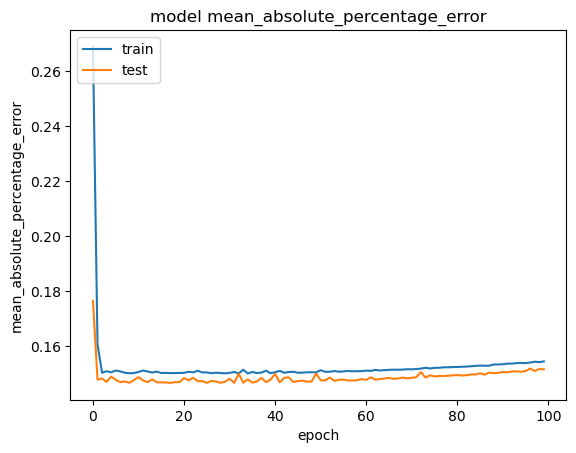

In [27]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean_absolute_percentage_error')
plt.ylabel('mean_absolute_percentage_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

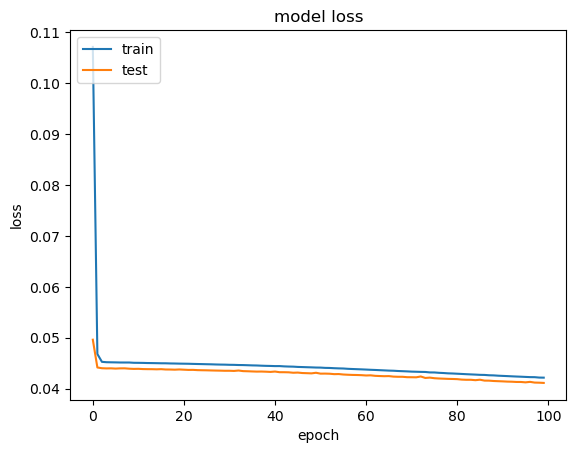

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 2. Learning rate and Drop out rate

In [29]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(tf.keras.layers.Dense(4, input_dim = 3, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(2100,input_dim = 3, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(learning_rate = learning_rate)

    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['mse', 'mae'])
    
    return model

In [30]:
model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 150,
                        epochs = 100)

In [31]:
# Define the grid search parameters

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,
                   dropout_rate = dropout_rate)

In [32]:
grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

In [33]:
grid_result = grid.fit(xtrain_scale,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  26.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  24.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  26.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  26.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  28.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END d

In [34]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### 3.Activation Function and Kernel Initializer

In [39]:
def create_model(activation_function, init):
    model = Sequential()
    model.add(tf.keras.layers.Dense(4, input_dim = 3, kernel_initializer = init, activation = activation_function))
    model.add(tf.keras.layers.Dense(2100,input_dim = 3, kernel_initializer = init, activation = activation_function))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(learning_rate = 0.001)

    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['mse', 'mae'])
    
    return model

In [40]:
model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 150,
                        epochs = 100)

In [41]:
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)

In [42]:
grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(xtrain_scale,ytrain_scale)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  49.7s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  50.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  49.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  48.5s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  49.5s
[CV 1/5; 2/12] START activation_function=softmax, init=normal.............

[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=  31.2s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=  31.9s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  32.2s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  31.4s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  31.3s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  31.4s
[CV 5/5; 11/12] START activation_function=linea

In [43]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'normal'}
nan,nan with: {'activation_function': 'softmax', 'init': 'zero'}
nan,nan with: {'activation_function': 'relu', 'init': 'uniform'}
nan,nan with: {'activation_function': 'relu', 'init': 'normal'}
nan,nan with: {'activation_function': 'relu', 'init': 'zero'}
nan,nan with: {'activation_function': 'tanh', 'init': 'uniform'}
nan,nan with: {'activation_function': 'tanh', 'init': 'normal'}
nan,nan with: {'activation_function': 'tanh', 'init': 'zero'}
nan,nan with: {'activation_function': 'linear', 'init': 'uniform'}
nan,nan with: {'activation_function': 'linear', 'init': 'normal'}
nan,nan with: {'activation_function': 'linear', 'init': 'zero'}


### 4.Number of Neurons in activation layer

In [47]:
def create_model(neuron1, neuron2):
    model = Sequential()
    model.add(tf.keras.layers.Dense(neuron1, input_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
    model.add(tf.keras.layers.Dense(neuron2,input_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(learning_rate = 0.001)

    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['mse'])
    
    return model

In [48]:
model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 150,
                        epochs = 100)

In [49]:
neuron1 = [4, 8, 16]
neuron2 = [4, 8, 16]

param_grids = dict(neuron1 = neuron1,
                   neuron2 = neuron2)

In [50]:
grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  20.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  20.3s
[CV 3/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 3/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  20.4s
[CV 4/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 4/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  20.3s
[CV 5/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 5/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  20.1s
[CV 1/5; 2/9] START neuron1=4, neuron2=8........................................
[CV 1/5; 2/9] END ...........neuron1=4, neuron2=8

In [53]:
print('Best : {}, using {}'.format(grid_result,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001D955BAF820>,
             param_grid={'neuron1': [4, 8, 16], 'neuron2': [4, 8, 16]},
             verbose=10), using {'neuron1': 4, 'neuron2': 4}
nan,nan with: {'neuron1': 4, 'neuron2': 4}
nan,nan with: {'neuron1': 4, 'neuron2': 8}
nan,nan with: {'neuron1': 4, 'neuron2': 16}
nan,nan with: {'neuron1': 8, 'neuron2': 4}
nan,nan with: {'neuron1': 8, 'neuron2': 8}
nan,nan with: {'neuron1': 8, 'neuron2': 16}
nan,nan with: {'neuron1': 16, 'neuron2': 4}
nan,nan with: {'neuron1': 16, 'neuron2': 8}
nan,nan with: {'neuron1': 16, 'neuron2': 16}


### Final model

In [54]:
model = Sequential()
model.add(tf.keras.layers.Dense(4, input_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
model.add(tf.keras.layers.Dense(4,input_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    
adam = adam_v2.Adam(learning_rate = 0.001)

model.compile(loss = 'mean_squared_error', 
              optimizer = adam, 
              metrics = ['mean_squared_error'])

In [55]:
y_predict = model.predict(xtest_scale)

141/141 [==============================] - 0s 2ms/step


In [56]:
history = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 2s 10ms/step - loss: 0.2233 - mean_squared_error: 0.2233 - val_loss: 0.1651 - val_mean_squared_error: 0.1651
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.1298 - mean_squared_error: 0.1298 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0621 - val_mean_squared_error: 0.0621
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 7/100
48/48 [==============

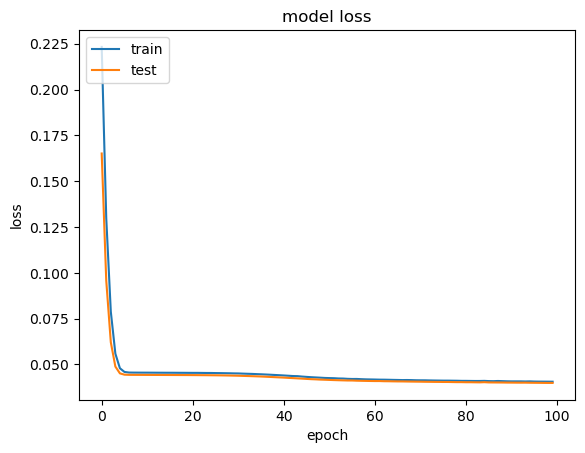

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
model.evaluate(xtest_scale, ytest_scale)

141/141 [==============================] - 0s 2ms/step - loss: 0.0412 - mean_squared_error: 0.0412


[0.04119029641151428, 0.04119029641151428]

After tuning each hyper-parameters mean_squared_error got reduced by 97%.